# Проект 3 Дашборд конверсий

## Шаг 1.

### Подготовка к работе с данными
Вы работаете аналитиком в образовательной платформе. Разработчики для вас сделали выгрузку данных о посещениях и регистрация через отдельную API.

### Посещения
uuid - id посетителя  
platform - платформа с которой был заход на сайт: web, ios, android, bot  
user_agent - User-Agent посещения  
date - дата посещения сайта

### Регистрации
date - дата регистрации на сайте  
user_id - id зарегистрированного пользователя  
email - почта пользователя  
platform - платформа с которой была сделана регистрация: web, ios, android  
registration_type - тип регистрации: email, google, yandex, apple

### Задачи
- Склонируйте созданный репозиторий проекта на рабочую машину
- Создайте Jypyter Notebook и подключите необходимые библиотеки (pandas, requests)
- Запросите данные по API за период 2023-03-01 -> 2023-09-01
- Изучите данные, сделайте предварительный анализ с помощью dataframe.describe
- В этом проекте вы можете использовать только следующие библиотеки:
  - pandas
  - matplotlib
  - numpy
  - seaborn
  - requests
  - plotly
  - python-dotenv

### Импорты 

In [5]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

#### Загрузка тестовых данных

In [7]:
visits = pd.read_csv('./visits_1k.csv')
visits.head()

,uuid,platform,user_agent,date
0,1de9ea66-70d3-4a1f-8735-df5ef7697fb9,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,2023-03-01T13:29:22
1,f149f542-e935-4870-9734-6b4501eaf614,web,Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,2023-03-01T16:44:28
2,f149f542-e935-4870-9734-6b4501eaf614,web,Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,2023-03-06T06:12:36
3,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1,web,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...,2023-03-01T20:16:37
4,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1,web,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...,2023-03-05T17:42:47


In [8]:
regs = pd.read_csv('./regs_1k.csv')
regs.head()

,date,user_id,email,platform,registration_type
0,2023-03-01T00:25:39,8838849,joseph95@example.org,web,google
1,2023-03-01T14:53:01,8741065,janetsuarez@example.net,web,yandex
2,2023-03-01T14:27:36,1866654,robert67@example.org,web,google
3,2023-03-01T02:42:34,1577584,elam@example.net,web,apple
4,2023-03-01T10:27:14,4765395,stephanie68@example.net,web,yandex


#### Привел дату к дейттайм и сделал дескрайб)

In [10]:
visits['date'] = pd.to_datetime(visits['date'])
regs['date'] = pd.to_datetime(regs['date'])

In [11]:
visits.describe()

,date
count,1000
mean,2023-03-02 18:25:04.564000256
min,2023-03-01 00:05:35
25%,2023-03-01 12:02:27
50%,2023-03-01 23:28:04.500000
75%,2023-03-03 21:42:13.249999872
max,2023-03-07 23:05:08


In [12]:
regs.describe()

,date,user_id
count,1000,1.000000e+03
mean,2023-03-03 10:59:03.900000,4.488623e+06
min,2023-03-01 00:12:22,2.236800e+04
25%,2023-03-02 14:08:57.500000,2.235489e+06
50%,2023-03-03 10:33:06,4.473044e+06
75%,2023-03-04 07:32:06.500000,6.779707e+06
max,2023-03-05 22:04:01,8.881772e+06
std,NaN,2.620568e+06


## Шаг 2. Получаем данные из АПИ

### Задачи
* Запросите данные по API за период 2023-03-01 -> 2023-09-01
* Сохраните ваш ноутбук в репозитории

In [120]:
# Подтягиваем переменные из файла .env
load_dotenv()

DATE_BEGIN = os.getenv('DATE_BEGIN')
DATE_END = os.getenv('DATE_END')
API_URL = os.getenv('API_URL')

In [122]:
visits_response = requests.get(f'{API_URL}/visits', params={'begin': DATE_BEGIN, 'end': DATE_END})

if visits_response.status_code == 200:
    visits_data = visits_response.json()
    visits_df = pd.DataFrame(visits_data)
    print('success')
else:
    print(f'error code {visits_response.status_code}')

success


In [17]:
# получаем данные по апи и сразу фильтруем по дате
regs_response = requests.get(f'{API_URL}/registrations', params={'begin': DATE_BEGIN, 'end': DATE_END})

if regs_response.status_code == 200:
    regs_data = regs_response.json()
    regs_df = pd.DataFrame(regs_data)
    print('success')
else:
    print(f'error code {regs_response.status_code}')

success


In [18]:
# Общая информация о визитах
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263459 entries, 0 to 263458
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   datetime    263459 non-null  object
 1   platform    263459 non-null  object
 2   user_agent  263459 non-null  object
 3   visit_id    263459 non-null  object
dtypes: object(4)
memory usage: 8.0+ MB


In [19]:
# Выводим первые 5 строк для ознакомления с данными
visits_df.head()

,datetime,platform,user_agent,visit_id
0,"Wed, 01 Mar 2023 10:36:22 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9
1,"Wed, 01 Mar 2023 06:25:00 GMT",web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,f149f542-e935-4870-9734-6b4501eaf614
2,"Wed, 01 Mar 2023 10:26:13 GMT",web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1
3,"Wed, 01 Mar 2023 12:33:06 GMT",web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,19322fed-157c-49c6-b16e-2d5cabeb9592
4,"Wed, 01 Mar 2023 01:38:35 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,04762a22-3c9f-40c9-9ac9-6628c4381836


In [20]:
# Общая информация о регистрациях
regs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21836 entries, 0 to 21835
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   datetime           21836 non-null  object
 1   email              21836 non-null  object
 2   platform           21836 non-null  object
 3   registration_type  21836 non-null  object
 4   user_id            21836 non-null  object
dtypes: object(5)
memory usage: 853.1+ KB


In [21]:
# Выводим первые 5 строк для ознакомления с данными
regs_df.head()

,datetime,email,platform,registration_type,user_id
0,"Wed, 01 Mar 2023 07:40:13 GMT",ebyrd@example.org,web,google,2e0f6bb8-b029-4f45-a786-2b53990d37f1
1,"Wed, 01 Mar 2023 13:14:00 GMT",knightgerald@example.org,web,email,f007f97c-9d8b-48b5-af08-119bb8f6d9b6
2,"Wed, 01 Mar 2023 03:05:50 GMT",cherylthompson@example.com,web,apple,24ff46ae-32b3-4a74-8f27-7cf0b8f32f15
3,"Wed, 01 Mar 2023 00:04:47 GMT",halldavid@example.org,web,email,3e9914e1-5d73-4c23-b25d-b59a3aeb2b60
4,"Wed, 01 Mar 2023 18:31:52 GMT",denise86@example.net,web,google,27f875fc-f8ce-4aeb-8722-0ecb283d0760


### Выгрузка прошла успешно
Данные загрузились корректно

## Шаг 3. Рассчет метрик.

### Расчет метрик
В этом шаге расчитаем конверсию визитов в регистрации. На выходе у вас должен получиться датафрейм со следующими полями:

date_group - дата  
platform — платформа: web, ios, android  
visits — визиты в дату  
registrations — регистрации в дату  
conversion — конверсия  
Среди визитов есть боты — это поисковые и SEO-боты, которые регулярно сканируют страницы. Определить их можно по слову bot в User-Agent.

Сагрегируем данные по дате и платформам. Также сохраним полученный датафрейм в формате JSON.

### Требования
Данные должны быть отсортированы по дате, от ранних к более поздним
Визиты ботов не должны влиять на расчет конверсии.

### Задачи
Выполните Jupyter Notebook следующие задачи:

* Сгруппируйте данные визитов по датам и платформам
* Сгруппируйте также данные регистраций по датам и платформам
* Объедините датайфреймы, сделайте итоговый датафрейм с расчетом конверсии
* Сохраните датафрейм в формате JSON conversion.json
* Поля датафрейма:
  * date_group - сагрегированный столбец дат
  * platform - платформа (android,web,ios)
  * visits - визиты за период date_group
  * registrations - регистрации за период date_group
  * conversion - конверсия по платформе

#### Приведем дату к формату дейттайм и добавим столбец с датой

In [26]:
regs_df['date'] = pd.to_datetime(regs_df['datetime']).dt.date
visits_df['date'] = pd.to_datetime(visits_df['datetime']).dt.date

### Фильруем от ботов

In [28]:
visits_df = visits_df[~visits_df['user_agent'].str.contains('bot', case=False, na=False)]
visits_df.head()

,datetime,platform,user_agent,visit_id,date
0,"Wed, 01 Mar 2023 10:36:22 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9,2023-03-01
1,"Wed, 01 Mar 2023 06:25:00 GMT",web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,f149f542-e935-4870-9734-6b4501eaf614,2023-03-01
2,"Wed, 01 Mar 2023 10:26:13 GMT",web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1,2023-03-01
3,"Wed, 01 Mar 2023 12:33:06 GMT",web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,19322fed-157c-49c6-b16e-2d5cabeb9592,2023-03-01
4,"Wed, 01 Mar 2023 01:38:35 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,04762a22-3c9f-40c9-9ac9-6628c4381836,2023-03-01


### Группируем виситы и регистрации по дате и платформе. Визиты, считаем только уникальных пользователей за день

In [30]:
agg_visits = visits_df.groupby(['date', 'platform'])['visit_id'].nunique().reset_index()
agg_visits.columns = ['date_group', 'platform', 'visits']
agg_visits.head()

,date_group,platform,visits
0,2023-03-01,android,75
1,2023-03-01,ios,22
2,2023-03-01,web,815
3,2023-03-02,android,67
4,2023-03-02,ios,31


In [31]:
agg_regs = regs_df.groupby(['date', 'platform'])['user_id'].nunique().reset_index()
agg_regs.columns = ['date_group', 'platform', 'registrations']
agg_regs.head()

,date_group,platform,registrations
0,2023-03-01,android,61
1,2023-03-01,ios,18
2,2023-03-01,web,8
3,2023-03-02,android,59
4,2023-03-02,ios,24


### Мерджим визиты и регистрации по полям date_group и platform

In [33]:
merged_df = pd.merge(agg_visits,
                     agg_regs,
                     left_on = ['date_group', 'platform'],
                     right_on = ['date_group', 'platform'],
                     how = 'left')

In [34]:
merged_df.head()

,date_group,platform,visits,registrations
0,2023-03-01,android,75,61
1,2023-03-01,ios,22,18
2,2023-03-01,web,815,8
3,2023-03-02,android,67,59
4,2023-03-02,ios,31,24


### Считаем столбец конверсии и округляем до 2-ух знаков

In [36]:
merged_df['conversion'] = merged_df['registrations'] / merged_df['visits'] * 100
merged_df.head()

,date_group,platform,visits,registrations,conversion
0,2023-03-01,android,75,61,81.333333
1,2023-03-01,ios,22,18,81.818182
2,2023-03-01,web,815,8,0.981595
3,2023-03-02,android,67,59,88.059701
4,2023-03-02,ios,31,24,77.419355


### Из первого взгляда на данные видно, что на web идет большее количество визитов, но конверсия очень маленькая

### Сохраняем файл

In [39]:
merged_df.to_json('conversion.json')

## Шаг 4. Добавляем рекламы.

### Добавляем рекламы
В этом шаге добавим данные по рекламным кампаниям. На выходе получим датафрейм со следующими полями:

date_group — дата  
visits — визиты в дату  
registrations — регистрации в дату  
cost — затраты на рекламу, 0 если не было затрат  
utm_campaign — название рекламной кампании, none если не было в этот период рекламы  
Сагрегируем данные по дате и сохраним их в JSON  

### Описание CSV
CSV-таблица содержит записи следующего вида:

date — дата проведения кампании  
utm_source — utm-источник: yandex, vk, google, youtube, tg  
utm_medium — utm-медиум: cpc или social  
utm_campaign — название кампании  
cost — затраты на рекламу  

### Требования
Данные должны быть отсортированы по дате, от ранних к более поздним

### Задачи
Выполните Jupyter Notebook следующие задачи:

- Объедините датайфрейм конверсий с рекламными кампаниями
- Сохраните датафрейм в формате JSON с именем ads.json

In [42]:
ads_df = pd.read_csv('./ads.csv')
ads_df.head()

,date,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01T10:54:41,google,cpc,advanced_algorithms_series,212
1,2023-03-02T10:32:35,google,cpc,advanced_algorithms_series,252
2,2023-03-03T19:21:40,google,cpc,advanced_algorithms_series,202
3,2023-03-04T17:52:04,google,cpc,advanced_algorithms_series,223
4,2023-03-05T05:35:13,google,cpc,advanced_algorithms_series,265


### Приведем столбец date к формату datetime и добавим отдельный столбец с датой для удобства

In [44]:
ads_df['date'] = pd.to_datetime(ads_df['date'])
ads_df['date_dt'] = ads_df['date'].dt.date
ads_df.head()

,date,utm_source,utm_medium,utm_campaign,cost,date_dt
0,2023-03-01 10:54:41,google,cpc,advanced_algorithms_series,212,2023-03-01
1,2023-03-02 10:32:35,google,cpc,advanced_algorithms_series,252,2023-03-02
2,2023-03-03 19:21:40,google,cpc,advanced_algorithms_series,202,2023-03-03
3,2023-03-04 17:52:04,google,cpc,advanced_algorithms_series,223,2023-03-04
4,2023-03-05 05:35:13,google,cpc,advanced_algorithms_series,265,2023-03-05


In [45]:
ads_df['utm_source'].unique()

array(['google', 'yandex', 'vk'], dtype=object)

 ### Группируем данные, для последующего анализа

In [47]:
agg_ads = ads_df.groupby('date_dt').agg({'utm_campaign': 'first', 'cost': 'sum'}).reset_index()
agg_ads.columns = ['date_group', 'utm_campaign', 'cost']
agg_ads.head()

,date_group,utm_campaign,cost
0,2023-03-01,advanced_algorithms_series,212
1,2023-03-02,advanced_algorithms_series,252
2,2023-03-03,advanced_algorithms_series,202
3,2023-03-04,advanced_algorithms_series,223
4,2023-03-05,advanced_algorithms_series,265


Чтобы правильно смерджить две таблицы, нам нужно создать дополнительную таблицу, без группировки по платформам

In [49]:
agg_merged_df = merged_df.groupby('date_group').agg({'visits': 'sum', 'registrations': 'sum'}).reset_index()
agg_merged_df

,date_group,visits,registrations
0,2023-03-01,912,87
1,2023-03-02,1197,106
2,2023-03-03,1529,107
3,2023-03-04,1700,159
4,2023-03-05,1781,115
...,...,...,...
179,2023-08-27,1554,88
180,2023-08-28,1293,83
181,2023-08-29,1642,143
182,2023-08-30,1439,101


In [50]:
result_df = pd.merge(agg_merged_df, agg_ads, on='date_group', how='left')

In [51]:
result_df.head()

,date_group,visits,registrations,utm_campaign,cost
0,2023-03-01,912,87,advanced_algorithms_series,212.0
1,2023-03-02,1197,106,advanced_algorithms_series,252.0
2,2023-03-03,1529,107,advanced_algorithms_series,202.0
3,2023-03-04,1700,159,advanced_algorithms_series,223.0
4,2023-03-05,1781,115,advanced_algorithms_series,265.0


In [52]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date_group     184 non-null    object 
 1   visits         184 non-null    int64  
 2   registrations  184 non-null    int64  
 3   utm_campaign   142 non-null    object 
 4   cost           142 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 7.3+ KB


### Заполняем пропуски в расходах ноликами)

In [54]:
result_df['cost'] = result_df['cost'].fillna(0)

### Сохраняем датасет в json файл

In [56]:
result_df.to_json('ads.json')

## Шаг 5. Визуализация.

### Визуализация
В этом шаге визуализируем наши расчеты. Построим следующие графики в формате PNG:

- [x] Итоговые визиты
- [x] Итоговые визиты с разбивкой по платформам: web, android, ios
- [x] Итоговые регистрации
- [x] Итоговые регистрации с разбивкой по платформе: web, android, ios
- [x] Конверсия по каждой платформе
- [x] Средняя конверсия
- [ ] Стоимости реклам
- [ ] Визиты за весь период с цветовым выделением рекламной кампании
- [ ] Регистрации за весь период с цветовым выделением рекламной кампании

### Задачи
Выполните Jupyter Notebook следующие задачи:
- Установите библиотеки для визуализации
- Постройте требуемые графики
- Сохраните их в PNG в директорию ./charts, например как plt.savefig('./charts/registrations_by_platform.png')

### Визиты всего

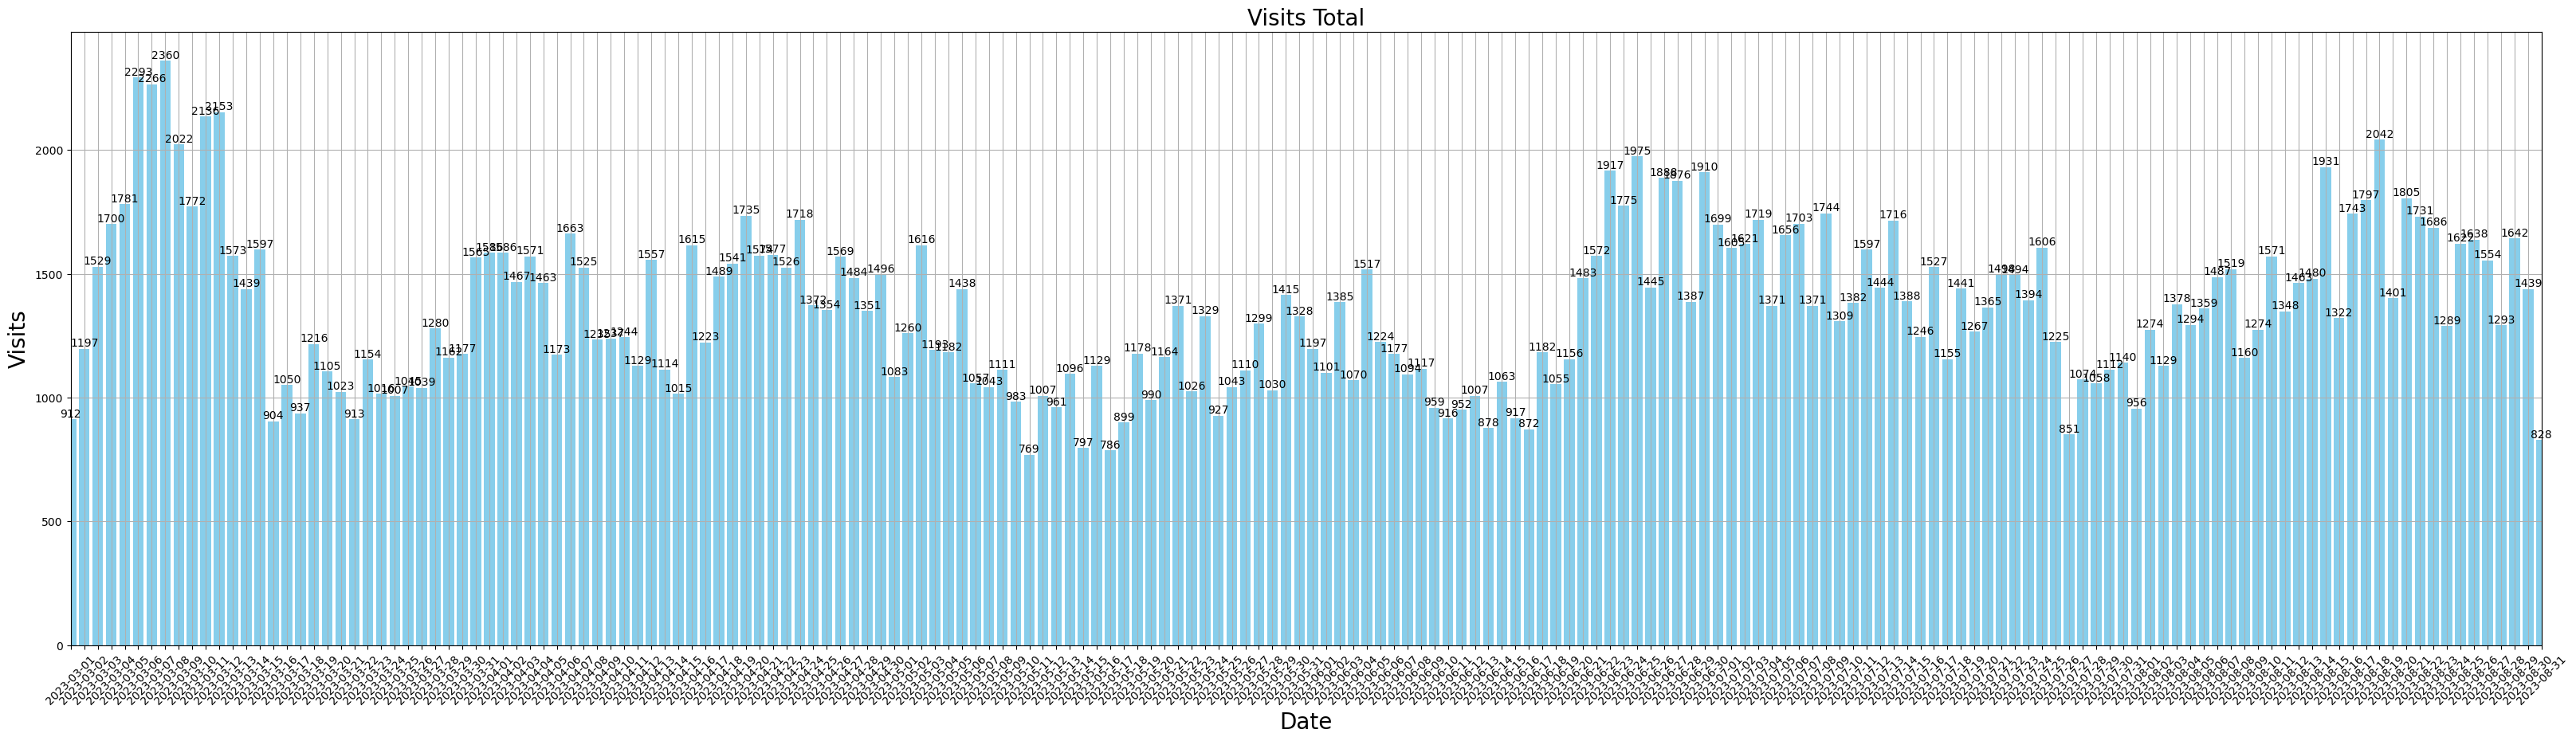

In [60]:
# Задаем размер полотна
plt.figure(figsize=(40,10))

# Создаем график и присваиваем его переменной bars для последующей подписки столбцов 
bars = plt.bar(result_df['date_group'], result_df['visits'], color='skyblue')

# Настройка тиков и подписей
plt.xticks(rotation=45)
plt.xticks(result_df['date_group'])
plt.xlim(result_df['date_group'].min(), result_df['date_group'].max())

# Подписываем бары с помощью plt.bar_label()
plt.bar_label(bars)

plt.xlabel('Date', fontsize=20)
plt.ylabel('Visits', fontsize=20)
plt.title('Visits Total', fontsize=20)
plt.grid()
plt.savefig('./charts/visits_overal.png')
plt.show()

### Визиты по платформам

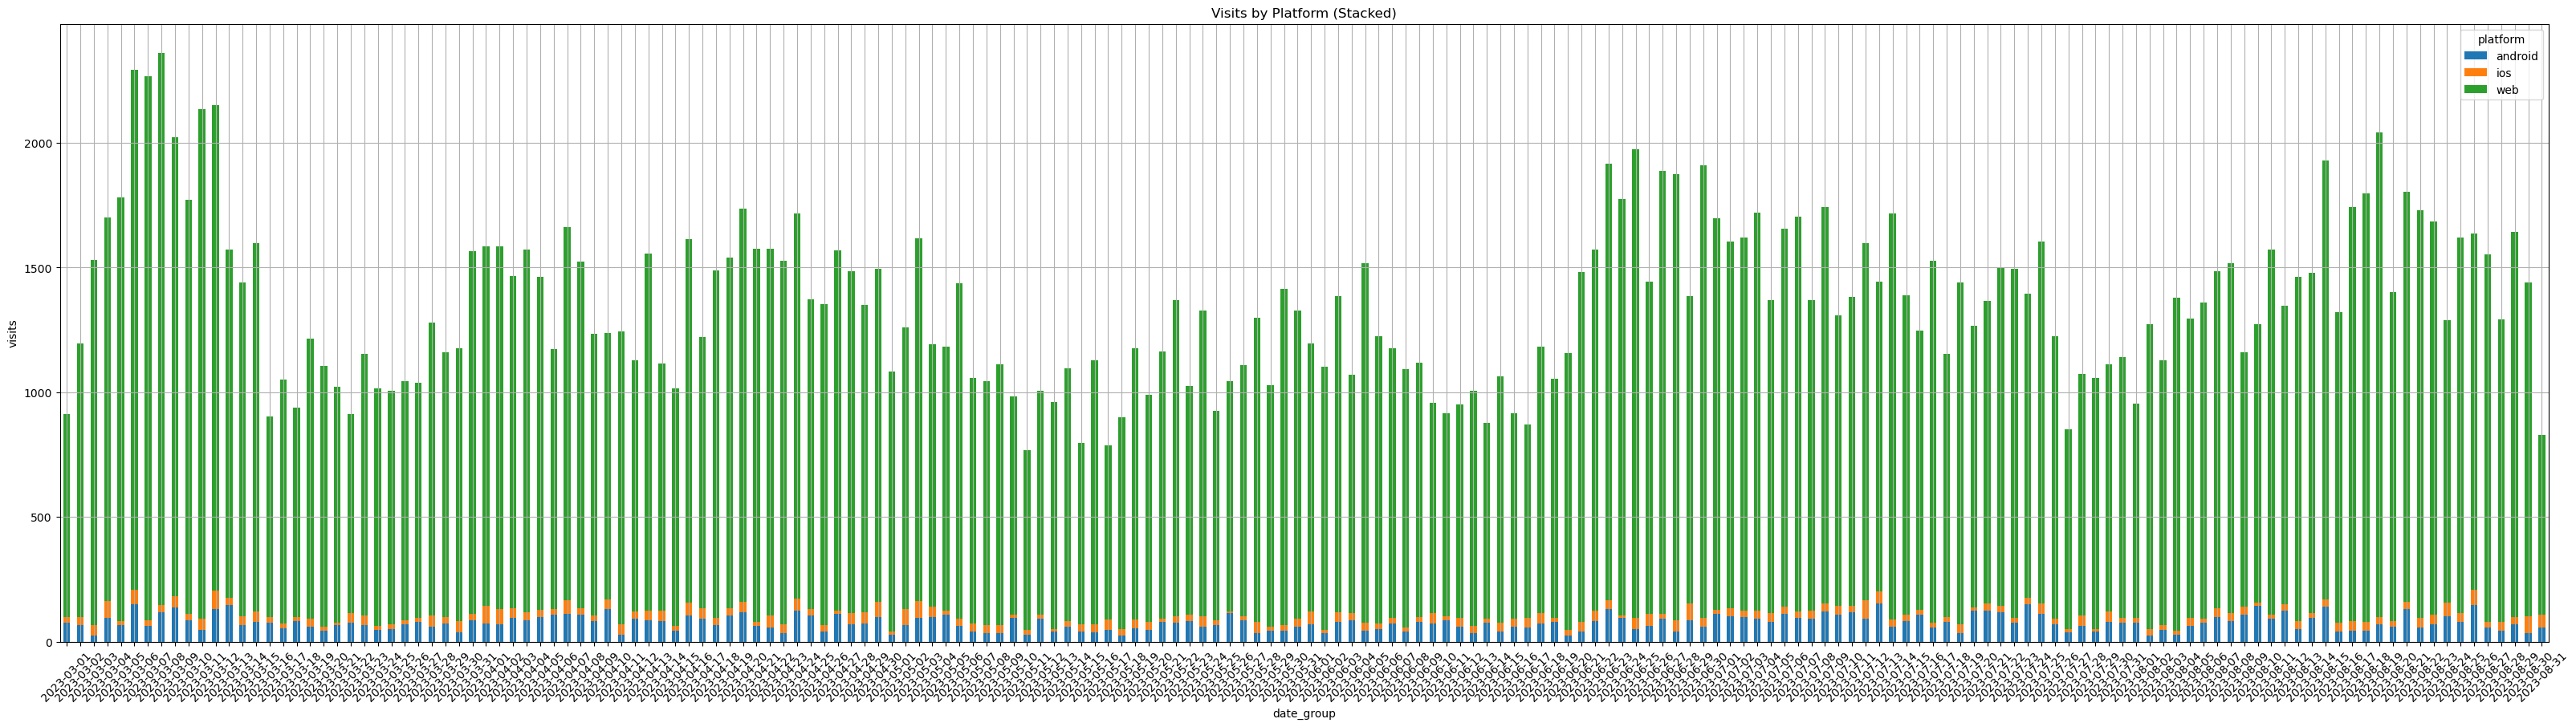

In [62]:
visits_grouped = merged_df.groupby(['date_group', 'platform'])['visits'].sum().unstack()
visits_grouped.plot(kind='bar', stacked=True, figsize=(40, 10))
plt.xticks(rotation=45)
plt.title('Visits by Platform (Stacked)')
plt.ylabel('visits')
plt.grid()
plt.savefig('./charts/visits_by_platform.png')
plt.show()

### Регистраций всего

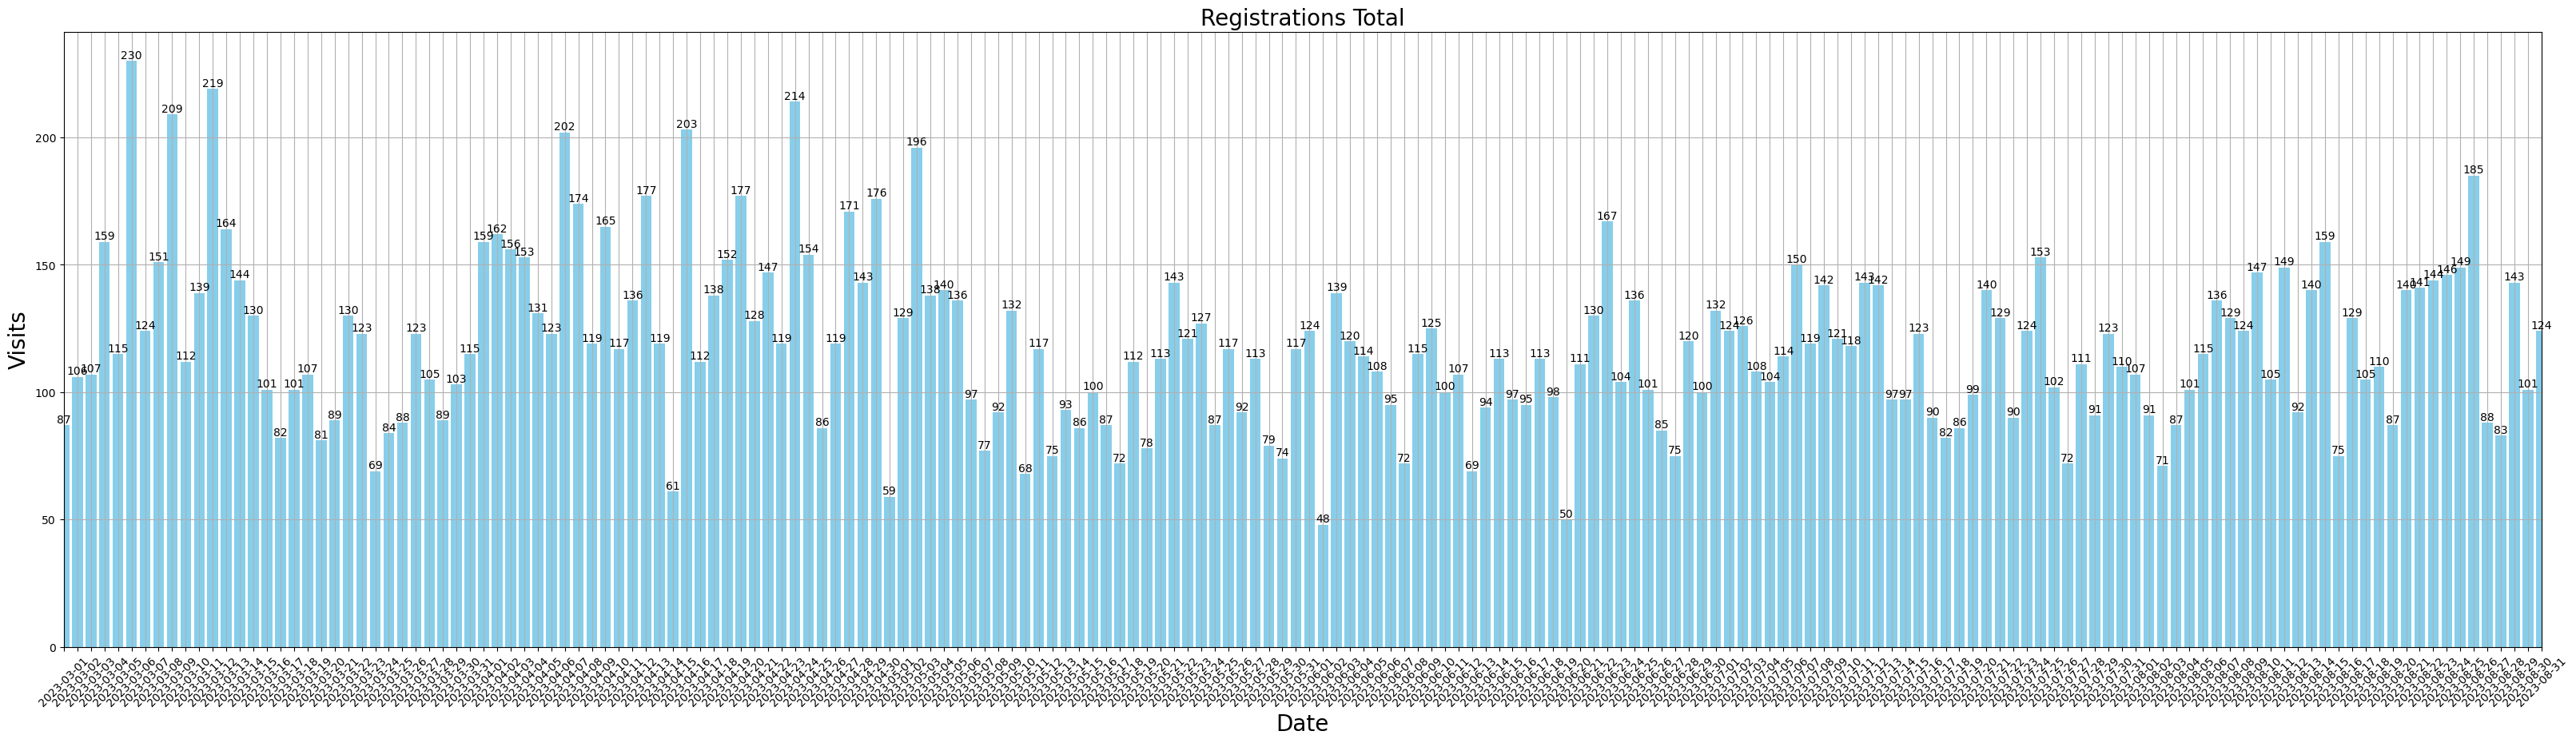

In [64]:
plt.figure(figsize=(40,10))

bars = plt.bar(result_df['date_group'], result_df['registrations'], color='skyblue')
plt.xticks(rotation=45)
plt.xticks(result_df['date_group'])
plt.xlim(result_df['date_group'].min(), result_df['date_group'].max())
plt.bar_label(bars)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Visits', fontsize=20)
plt.title('Registrations Total', fontsize=20)
plt.grid()
plt.savefig('./charts/registrations_overal.png')
plt.show()

### Регистраций по платформам

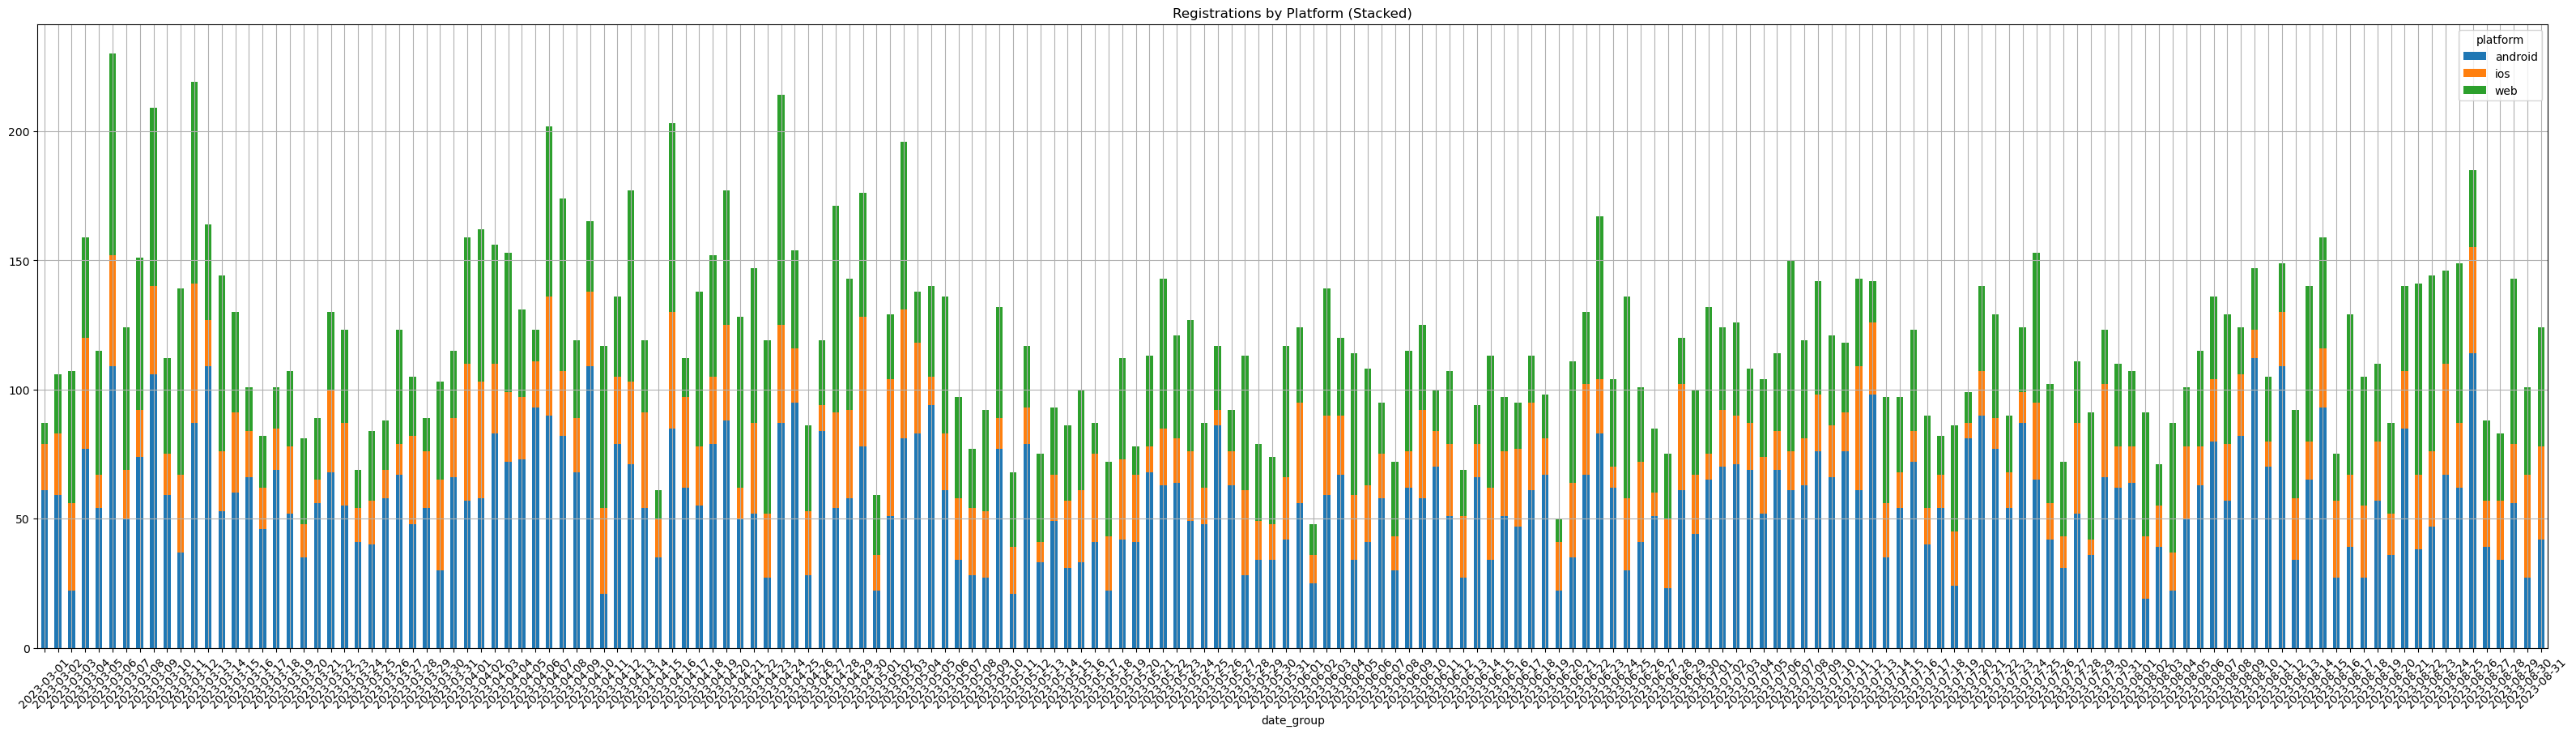

In [66]:
regs_grouped = merged_df.groupby(['date_group', 'platform'])['registrations'].sum().unstack()
regs_grouped.plot(kind='bar', stacked=True, figsize=(40, 10))
plt.xticks(rotation=45)
plt.title('Registrations by Platform (Stacked)')
plt.grid()
plt.savefig('./charts/registrations_by_platform.png')
plt.show()

### Конверсия в среднем

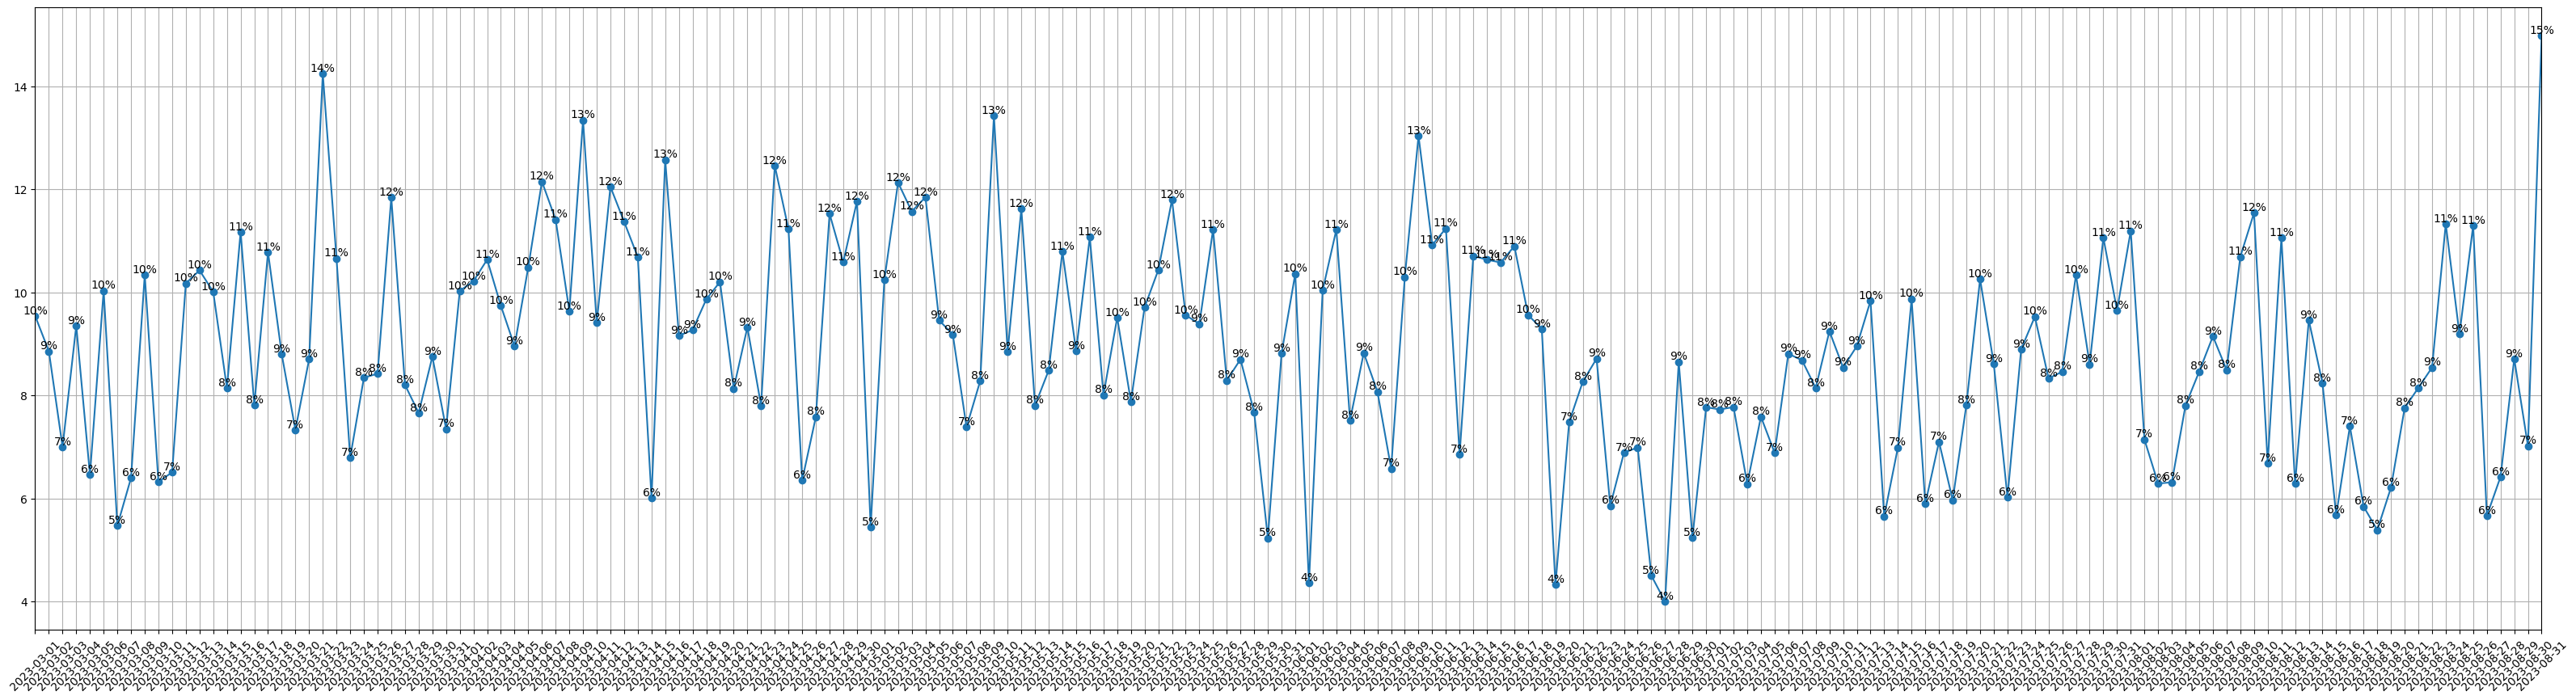

In [68]:
agg_conv = merged_df.groupby('date_group').agg({'visits': 'sum', 'registrations': 'sum'}).reset_index()
agg_conv['conversion'] = agg_conv['registrations'] / agg_conv['visits'] * 100

def label_points(x, y, ax):
    for i in range(len(x)):
        ax.text(x[i], y[i], f'{y[i]:.0f}%', ha='center', va='bottom')

plt.figure(figsize=(40, 10))
plt.plot(agg_conv['date_group'], agg_conv['conversion'], marker='o')

# Получаем текущие оси графика
ax = plt.gca()

label_points(agg_conv['date_group'], agg_conv['conversion'], ax)

plt.xticks(rotation=45)
plt.xticks(agg_conv['date_group'])
plt.xlim(agg_conv['date_group'].min(), agg_conv['date_group'].max())
plt.grid()
plt.savefig('./charts/conversion_overal.png')
plt.show()

### Конверсии по платформам

In [70]:
conv_groupped = merged_df.groupby(['date_group', 'platform'])['conversion'].sum().unstack()
conv_groupped

platform,android,ios,web
date_group,,,
2023-03-01,81.333333,81.818182,0.981595
2023-03-02,88.059701,77.419355,2.092812
2023-03-03,84.615385,85.000000,3.485988
2023-03-04,81.914894,63.235294,2.535761
2023-03-05,81.818182,81.250000,2.825191
...,...,...,...
2023-08-27,69.642857,75.000000,2.103121
2023-08-28,77.272727,65.714286,2.141680
2023-08-29,78.873239,82.142857,4.147764


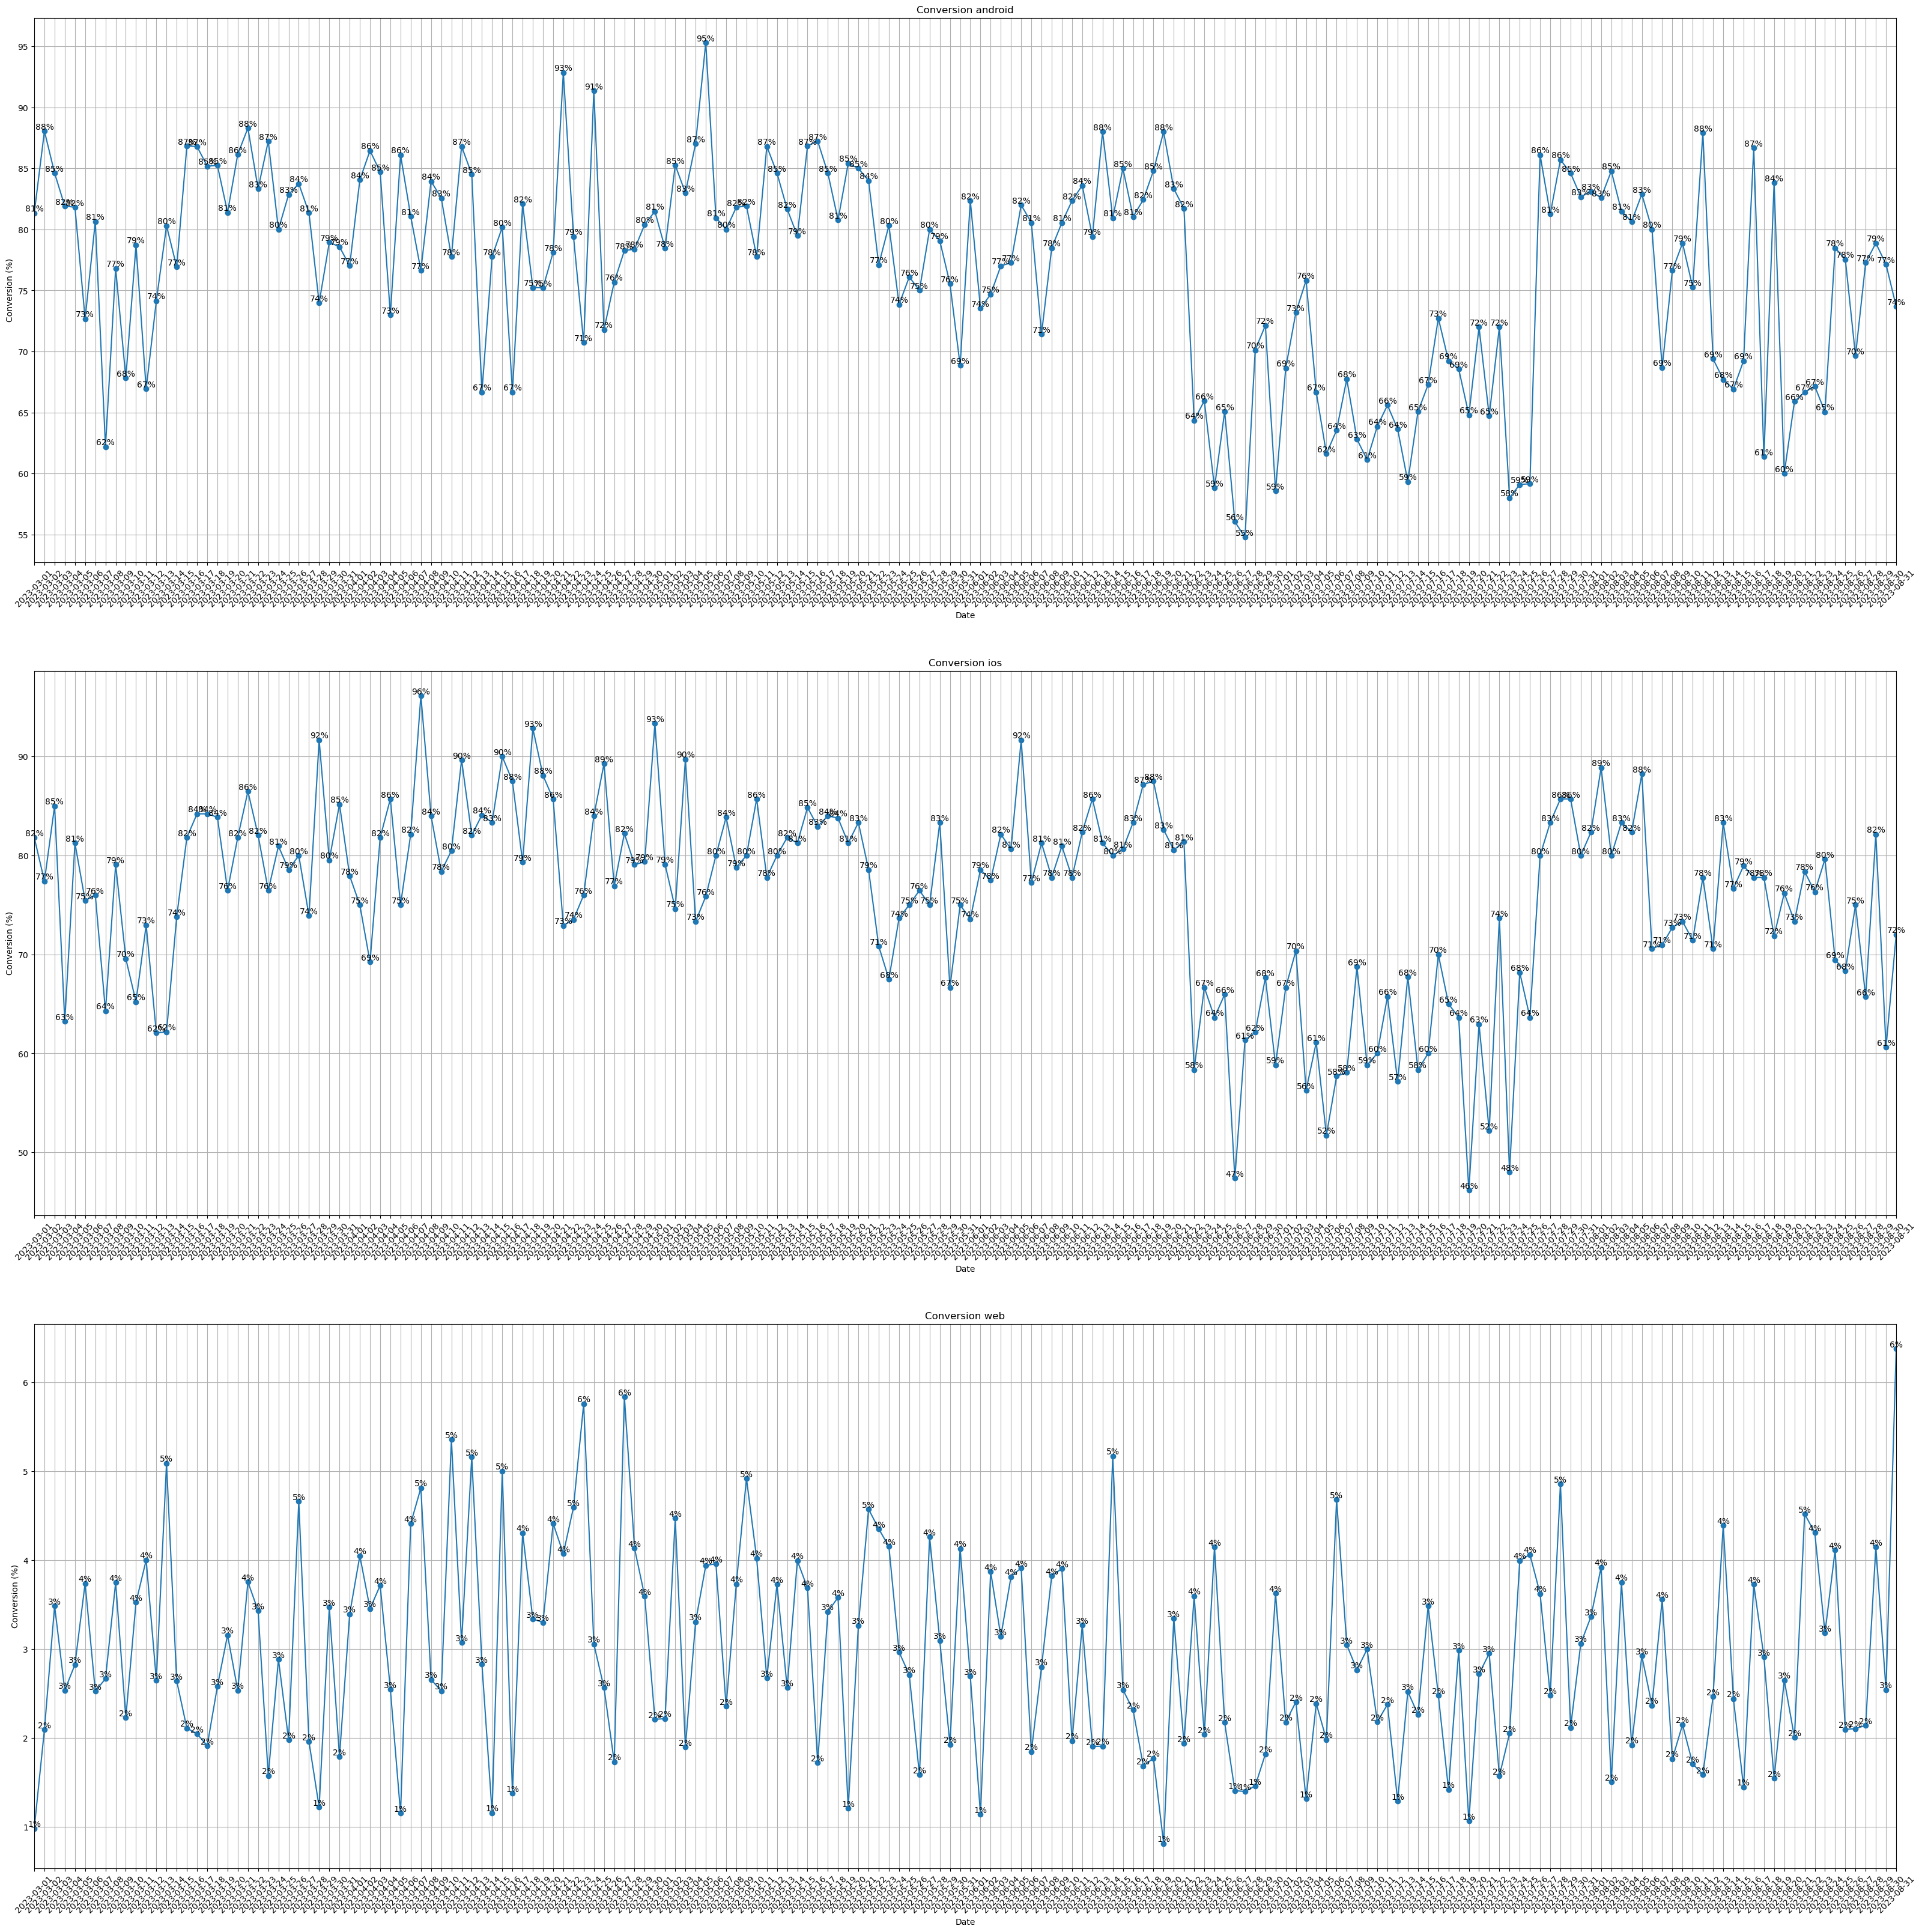

In [71]:
fig, ax = plt.subplots(3,1)
fig.set_size_inches(40, 40)

for i, col in enumerate(conv_groupped.columns):
    ax[i].plot(conv_groupped.index, conv_groupped[col], marker='o')
    # label_points(conv_groupped.index, conv_groupped[col], ax[i])
    for date in conv_groupped.index:
        ax[i].text(date, conv_groupped[col][date], f'{conv_groupped[col][date]:.0f}%', ha='center', va='bottom')
    
    ax[i].set_xticks(conv_groupped.index)
    ax[i].set_xticklabels(conv_groupped.index, rotation=45)
    ax[i].set_xlim(conv_groupped.index.min(), conv_groupped.index.max())
    ax[i].set_title(f'Conversion {col}')
    ax[i].set_ylabel('Conversion (%)')
    ax[i].set_xlabel('Date')
    ax[i].grid()

plt.savefig('./charts/conversion_by_platform.png')
plt.show()

### Расходы на рекламу

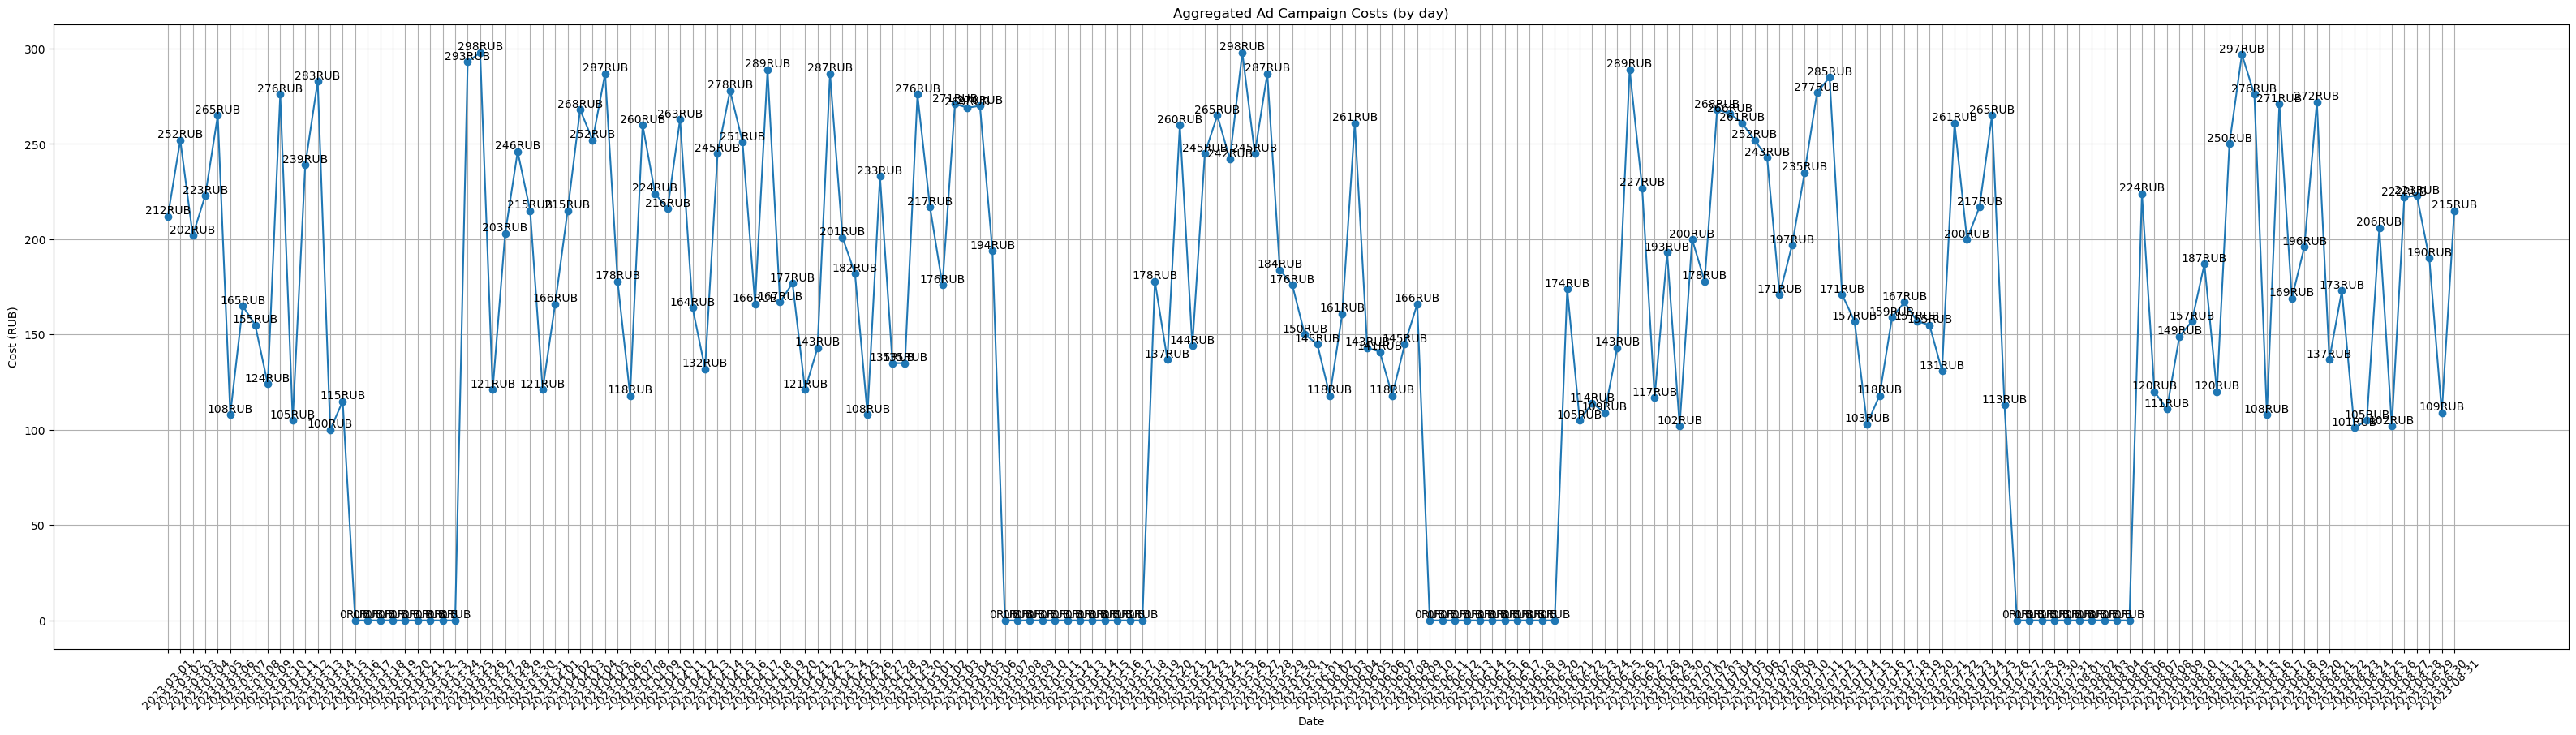

In [73]:
plt.figure(figsize=(40, 10))
plt.plot(result_df['date_group'], result_df['cost'], marker='o')

ax = plt.gca()

for i in range(len(result_df['date_group'])):
    ax.text(result_df['date_group'][i], result_df['cost'][i], f"{result_df['cost'][i]:.0f}RUB", ha='center', va='bottom')

plt.xticks(result_df['date_group'], rotation=45)
plt.xlabel('Date')
plt.ylabel('Cost (RUB)')
plt.title('Aggregated Ad Campaign Costs (by day)')
plt.grid()
plt.savefig('./charts/conversion_by_platform.png')
plt.show()

### Визиты и регистрации с выделением рекламных кампаний

In [75]:
result_df['utm_campaign'].unique()

array(['advanced_algorithms_series', nan, 'virtual_reality_workshop',
       'ui_ux_design_drive', 'women_in_tech_symposium',
       'intro_to_python_course'], dtype=object)

In [76]:
campaign_periods = result_df.groupby('utm_campaign').agg({'date_group': ['first','last']}).reset_index()
campaign_periods.columns = ['utm_campaign', 'start', 'end']
campaign_periods.sort_values(by='start', inplace=True)
campaign_periods.head()

,utm_campaign,start,end
0,advanced_algorithms_series,2023-03-01,2023-03-15
3,virtual_reality_workshop,2023-03-25,2023-05-06
2,ui_ux_design_drive,2023-05-19,2023-06-09
4,women_in_tech_symposium,2023-06-21,2023-07-26
1,intro_to_python_course,2023-08-06,2023-08-31


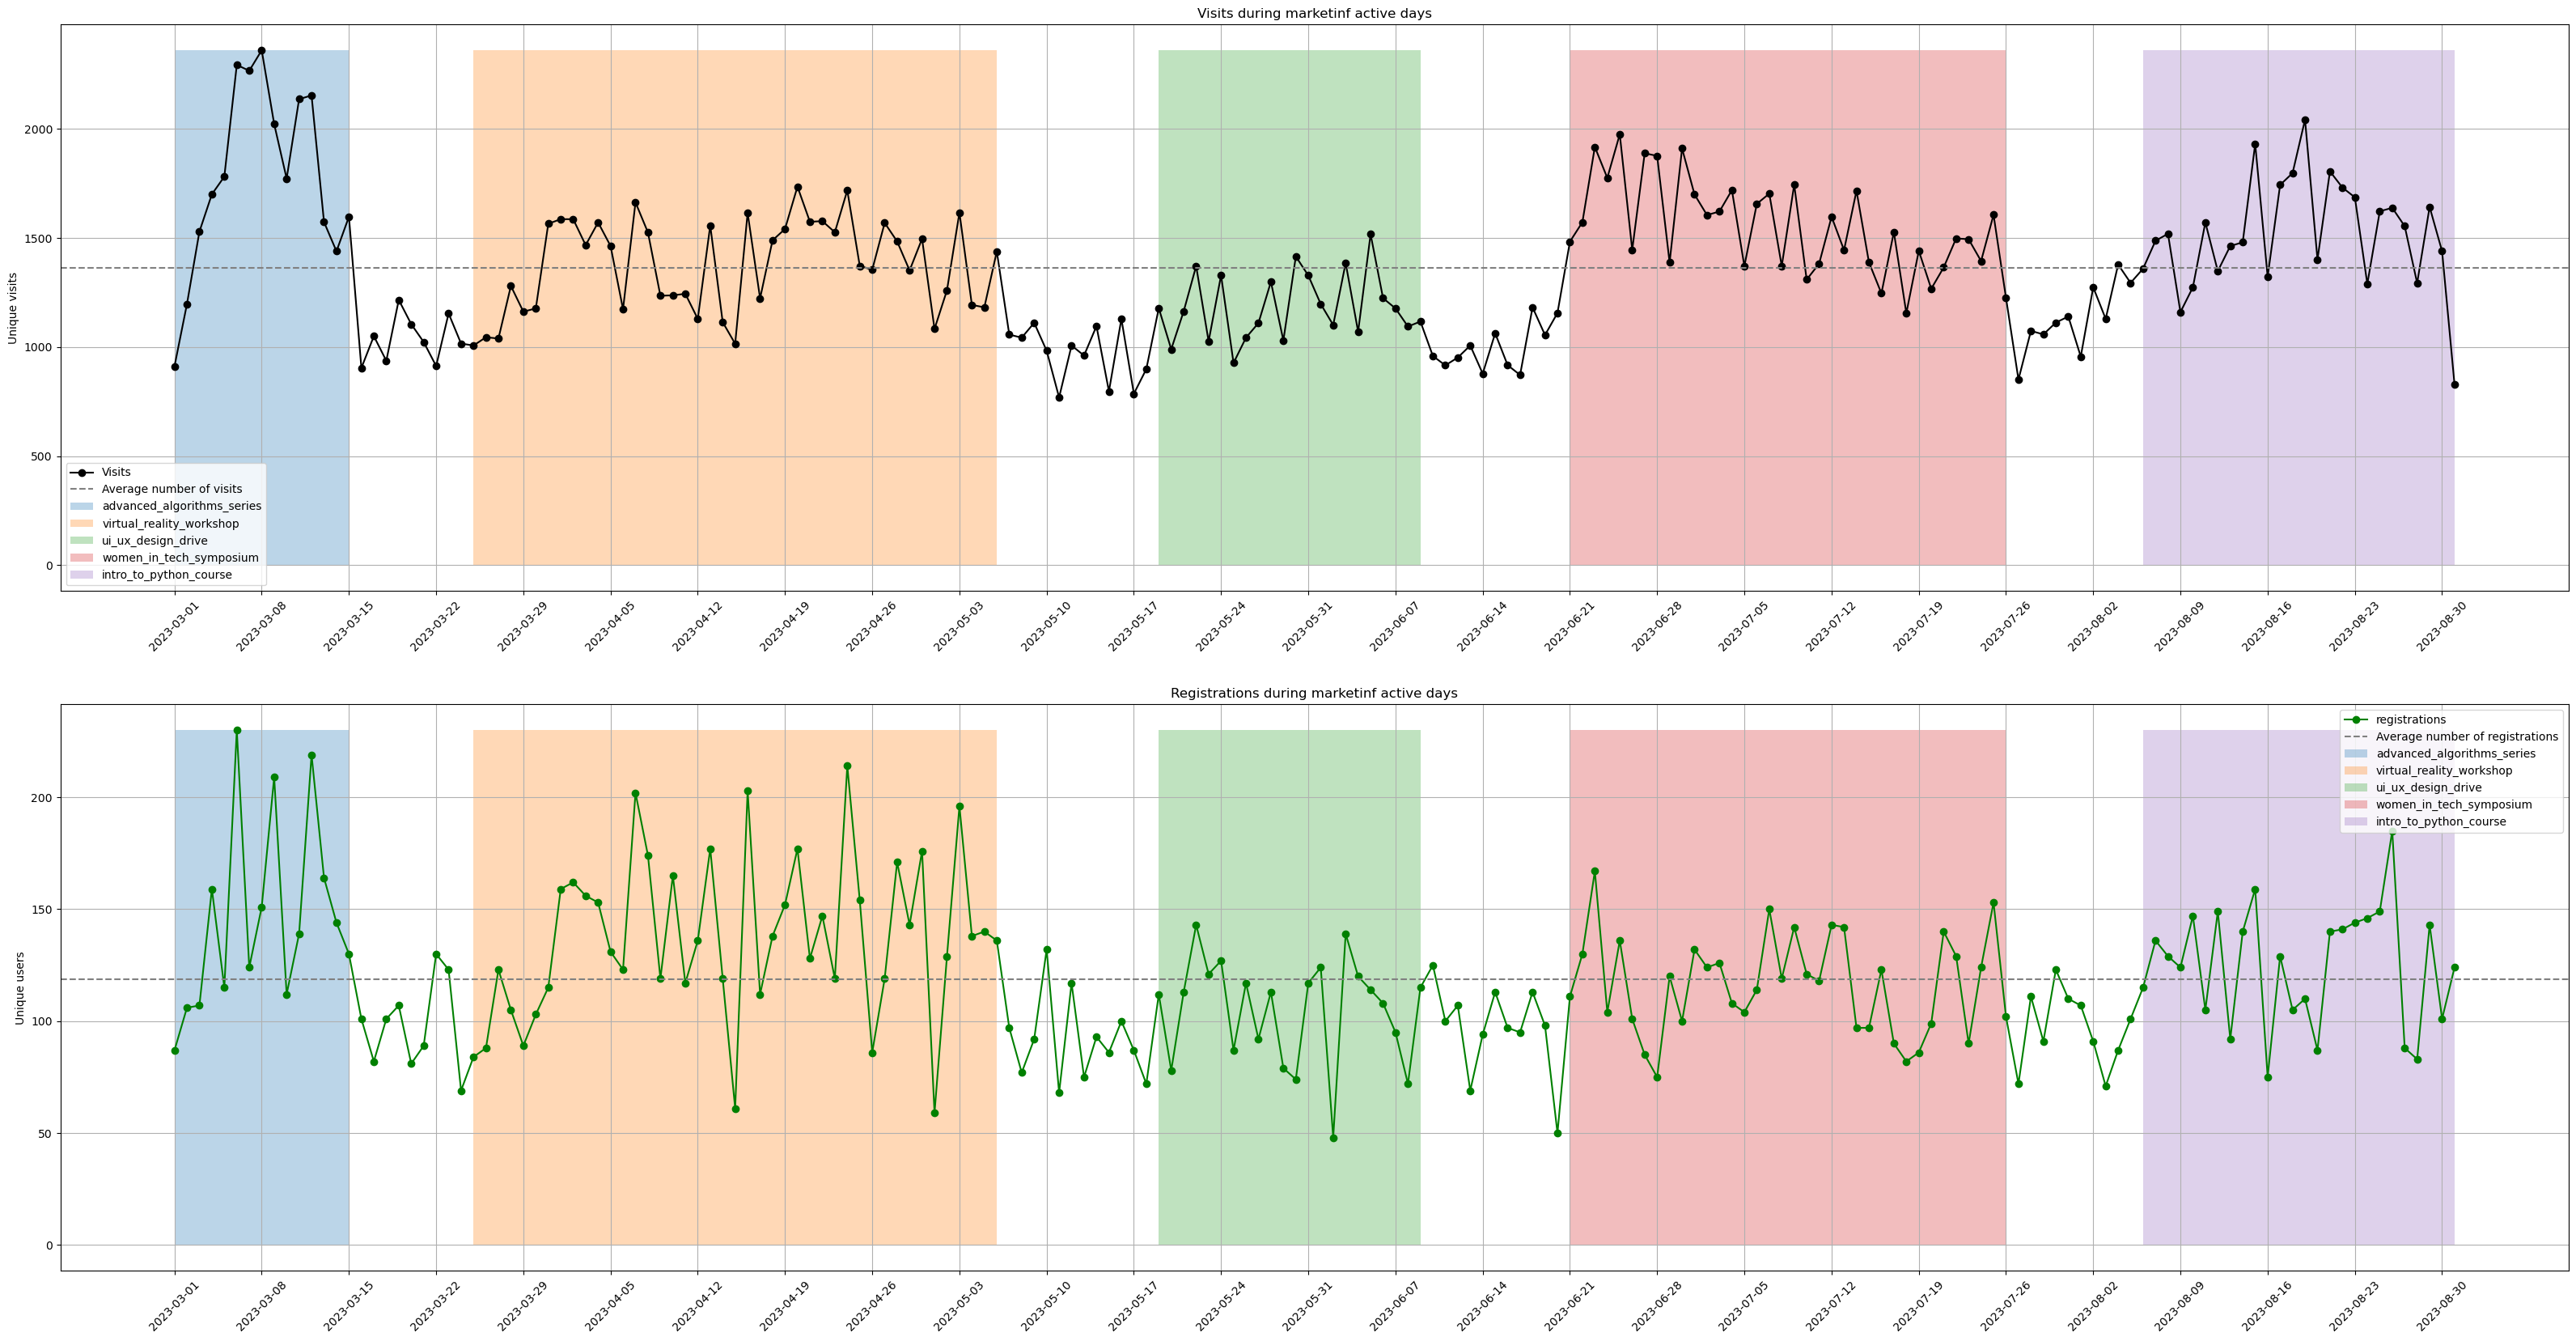

In [77]:
fig, ax = plt.subplots(2, 1, figsize=(40, 20))

ax[0].plot(result_df['date_group'], result_df['visits'], marker='o', linestyle='-', color='black', label='Visits')
ax[0].axhline(result_df['visits'].mean(), color='gray', linestyle='--', label='Average number of visits')

ax[1].plot(result_df['date_group'], result_df['registrations'], marker='o', linestyle='-', color='green', label='registrations')
ax[1].axhline(result_df['registrations'].mean(), color='gray', linestyle='--', label='Average number of registrations')

# Добавление кампаний
for index, row in campaign_periods.iterrows():
    campaign_period = (result_df['date_group'] >= row['start']) & (result_df['date_group'] <= row['end'])
    ax[0].fill_between(result_df['date_group'], 0, result_df['visits'].max(), where=campaign_period, alpha=0.3, label=row['utm_campaign'])
    ax[1].fill_between(result_df['date_group'], 0, result_df['registrations'].max(), where=campaign_period, alpha=0.3, label=row['utm_campaign'])

ax[0].set_xticks(result_df['date_group'][::7])
ax[0].set_xticklabels(result_df['date_group'][::7], rotation=45)
ax[0].legend(loc='lower left')
ax[0].set_title('Visits during marketinf active days')
ax[0].set_ylabel('Unique visits')
ax[0].grid()

ax[1].set_xticks(result_df['date_group'][::7])
ax[1].set_xticklabels(result_df['date_group'][::7], rotation=45)
ax[1].legend(loc='upper right')
ax[1].set_title('Registrations during marketinf active days')
ax[1].set_ylabel('Unique users')
ax[1].grid()

plt.savefig('./charts/visits and regs during marketing campaign.png')
plt.show()